<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/15psUSLE0MzkdcMwiJ5xXCl4ycKDDOJrq/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
   
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/0936d792b8e87847f8624bb906f74cd24badf030?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FapiMakeSens.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>

# Descubriendo los datos de las estaciones 
## Uso de la API MakeSens

Instalar Librerias

In [1]:
#!pip install APIMakeSens
#!pip install tk

Cargar librería *MakeSens*

In [1]:
# Makesens
from MakeSens import MakeSens

# Pandas 
import pandas as pd 

#  datetime para manejo de fechas
import datetime

# pytz para manejo de zonas horarias
import pytz

import pylab as plt

Definimos el  rango de fechas para descargar los datos:

In [2]:
#Vamos a descargar los datos desde hoy hasta 240 horas atras. Primero definimos la fecha de fin e inicio de la descarga
fechaFin = datetime.datetime.now(pytz.timezone('America/Bogota')).strftime('%Y-%m-%d %H:%M:%S')
fechaInicio = (datetime.datetime.now(pytz.timezone('America/Bogota'))-datetime.timedelta(hours=240)).strftime('%Y-%m-%d %H:%M:%S')


Ahora usamos la API de Makesens para descargar los datos (preguntale a tu instructor que otras alternativas tienes!)
>Para mayor información sobre las funciones de la API de makesens, puedes visitar su [página web](https://docs.makesens.co/help/api-sdk/makesensapi-en-python/makesens.download_data)

In [3]:
data = MakeSens.download_data('mE1_00004', fechaInicio, fechaFin, '1H')

Exploremos los datos del DataFrame!! 

In [4]:
data.head()

ts    humedad   humedad2  iluminancia     pm10_1  \
0 2023-08-16 17:00:00  38.897320  41.228504     6.000000  13.700000   
1 2023-08-16 18:00:00  41.789214  44.269801    39.071429  10.000000   
2 2023-08-16 19:00:00  42.114675  44.522121    41.428571   8.428571   
3 2023-08-16 20:00:00  38.560408  40.723931    41.857143   5.857143   
4 2023-08-16 21:00:00  38.032839  40.042586    42.000000   6.045455   

   pm10_1_AE     pm10_2  pm10_2_AE      pm1_1   pm1_1_AE  ...  pm_n_10_0_2  \
0  13.700000  14.200000  14.200000  10.000000  10.000000  ...     0.200000   
1  10.000000  10.285714  10.285714   7.071429   7.071429  ...     0.142857   
2   8.428571   7.571429   7.571429   5.428571   5.428571  ...     0.000000   
3   5.857143   5.428571   5.428571   3.714286   3.714286  ...     0.285714   
4   6.045455   5.363636   5.363636   4.181818   4.181818  ...     0.363636   

   pm_n_1_0_1  pm_n_1_0_2  pm_n_2_5_1  pm_n_2_5_2  pm_n_5_0_1  pm_n_5_0_2  \
0   66.700000   71.300000    5.000000    7.400000    1.800000    2.000000   
1   49.785714   54.071429    3.857143    4.285714    1.428571    1.000000   
2   40.071429   39.571429    5.142857    3.000000    1.285714    0.571429   
3   26.571429   21.428571    3.428571    2.285714    0.857143    0.857143   
4   26.000000   22.818182    3.454545    2.545455    1.000000    0.818182   

      presion  temperatura  temperatura2  
0  969.452265    28.068901     28.687991  
1  967.443556    28.146178     28.780804  
2  966.713915    28.195374     28.835164  
3  966.744908    28.157669     28.842603  
4  982.620261    27.273129     27.939668  

[5 rows x 31 columns]

1. ¿Cuál es el indice de los datos?
2. ¿Cuántas columnas tiene?  ¿Qué tipo de datos tiene cada columna?
3. ¿Qué significa cada columna?

In [40]:
#Columnas del paquete de datos que descargamos
data.columns.values

array(['humedad2', 'irradiancia', 'pm_n_2_5_2', 'pm25_1', 'pm25_2',
       'pm_temperatura', 'pm_n_2_5_1', 'iluminancia', 'pm1_1', 'pm1_2',
       'humedad', 'temperatura', 'presion', 'uv', 'pm_n_10_0_2',
       'pm_n_10_0_1', 'pm_n_0_5_2', 'temperatura2', 'pm_n_0_3_2',
       'pm_n_0_5_1', 'pm_n_0_3_1', 'pm_n_5_0_1', 'pm_humedad',
       'pm_n_5_0_2', 'pm10_2', 'pm10_1', 'pm_n_1_0_1', 'pm_n_1_0_2',
       'precipitacion'], dtype=object)

> Mira la página de [makesens](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos) para entender que representa cada columna

In [13]:
#Exploremos el valor máximo para cada columna
data.max()

humedad2          67.164636
pm_n_2_5_2        49.521739
pm25_1            39.695652
pm25_2            41.086957
pm1_1_AE          20.962963
pm10_2_AE          47.26087
pm_n_2_5_1        63.869565
iluminancia       54.483871
pm1_1             21.962963
pm25_1_AE         34.521739
pm1_2             22.235294
humedad           65.776849
temperatura       35.909904
presion         1019.413362
pm_n_10_0_2        5.952381
pm_n_10_0_1       14.727273
pm1_2_AE          21.117647
pm10_1_AE         50.956522
pm_n_0_5_2      1131.764706
temperatura2      34.657491
pm_n_0_3_2      3592.588235
pm_n_0_5_1      1118.037037
pm_n_0_3_1      3577.666667
pm_n_5_0_1        27.478261
pm_n_5_0_2        19.913043
pm10_2             53.73913
pm10_1            59.478261
pm25_2_AE         35.608696
pm_n_1_0_1       315.130435
pm_n_1_0_2       331.391304
longitud               None
latitud                None
dtype: object

In [ ]:
#¿Qué más quieres saber de los datos?

<Figure size 640x480 with 0 Axes>

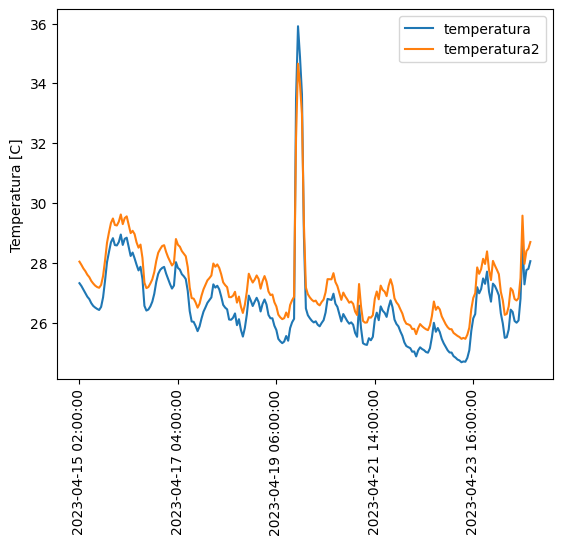

In [11]:
#Prueba graficando algunos datos. 
#Por ejemplo, grafiquemos la temperatura

fig=plt.figure()

data.plot( y=["temperatura","temperatura2"])

plt.xticks(rotation='vertical')
plt.ylabel("Temperatura [C]")

plt.show()

Resumiendo:

In [2]:
from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

HTML('<iframe width="660" height="415" src="https:&#x2F;&#x2F;www.canva.com&#x2F;design&#x2F;DAFwVICi7qs&#x2F;view?embed" title="Pandas Review" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')